In [1]:
from customEnv.SimpleCornIrrigationEnv import SimpleCornIrrigationEnv
from agent.ppo_model import PPOTrainerSimplified
from utils.TrainingVisualization import SimpleTrainingVisualizer
from utils.ModelVersionManager import ModelVersionManager

In [2]:
# Initialize the environment
env = SimpleCornIrrigationEnv(
    season_length=120,
    render_mode=None,
    difficulty="normal",
    region_type="temperate",
    seed=42
)

# Verify the environment
print("Observation Space:", env.observation_space)
print("Action Space:", env.action_space)

Observation Space: Box(0.0, [100. 120.   4.  40.  50. 100.], (6,), float32)
Action Space: Discrete(4)


In [3]:
# Set up model version manager and trainer
model_manager = ModelVersionManager(base_dir="./models")
trainer = PPOTrainerSimplified(model_version_manager=model_manager, log_dir="./logs/ppo")

In [4]:
# Train the PPO model
model, training_time, model_path = trainer.train(
    env=env,
    total_timesteps=10000,
    learning_rate=0.0003,
    n_steps=2048,
    batch_size=64,
    n_epochs=10,
    gamma=0.99,
    gae_lambda=0.95,
    clip_range=0.2,
    ent_coef=0.0,
    use_adaptive_lr=True,
    min_lr=0.00001,
    lr_decay_factor=0.95,
    lr_update_freq=10000,
    policy="MlpPolicy",
    seed=42,
    save_model=True,
    eval_freq=5000
)

print(f"Model saved at: {model_path}")

Loading best model from ./logs/ppo/best_model.zip (Log directory)


d:\eamonn\TARUMT RDS\Y2S3\ML\Assignment\Intelligent_Irrigation_System\.venv\Lib\site-packages\rich\live.py:231: 
UserWarning: install "ipywidgets" for Jupyter support
  warnings.warn('install "ipywidgets" for Jupyter support')


===== Model Training Summary =====
Continuing training from existing model
Model path: Auto-detected
Additional training steps: 10000
Learning rate: 0.0003 (Adaptive: True)



Learning rate adjusted to 0.000285 at step 190000

d:\eamonn\TARUMT 
RDS\Y2S3\ML\Assignment\Intelligent_Irrigation_System\.venv\Lib\site-packages\stable_baselines3\common\evaluation.py
:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting 
modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first
with ``Monitor`` wrapper.
  warnings.warn(

Eval num_timesteps=190000, episode_reward=1198.07 +/- 98.51

Episode length: 120.00 +/- 0.00

New best mean reward!

Eval num_timesteps=195000, episode_reward=1177.10 +/- 108.02

Episode length: 120.00 +/- 0.00

Training completed in 12.59 seconds
Model saved to: ./models/ppo_corn_irrigation_v3.zip
Metadata saved to: ./models/ppo_corn_irrigation_v3_metadata.json
Model saved at: ./models/ppo_corn_irrigation_v3


In [5]:
# Evaluate the model
results = trainer.evaluate(model, env, n_eval_episodes=10, deterministic=True)


Evaluation over 10 episodes: Average Reward = 1104.28


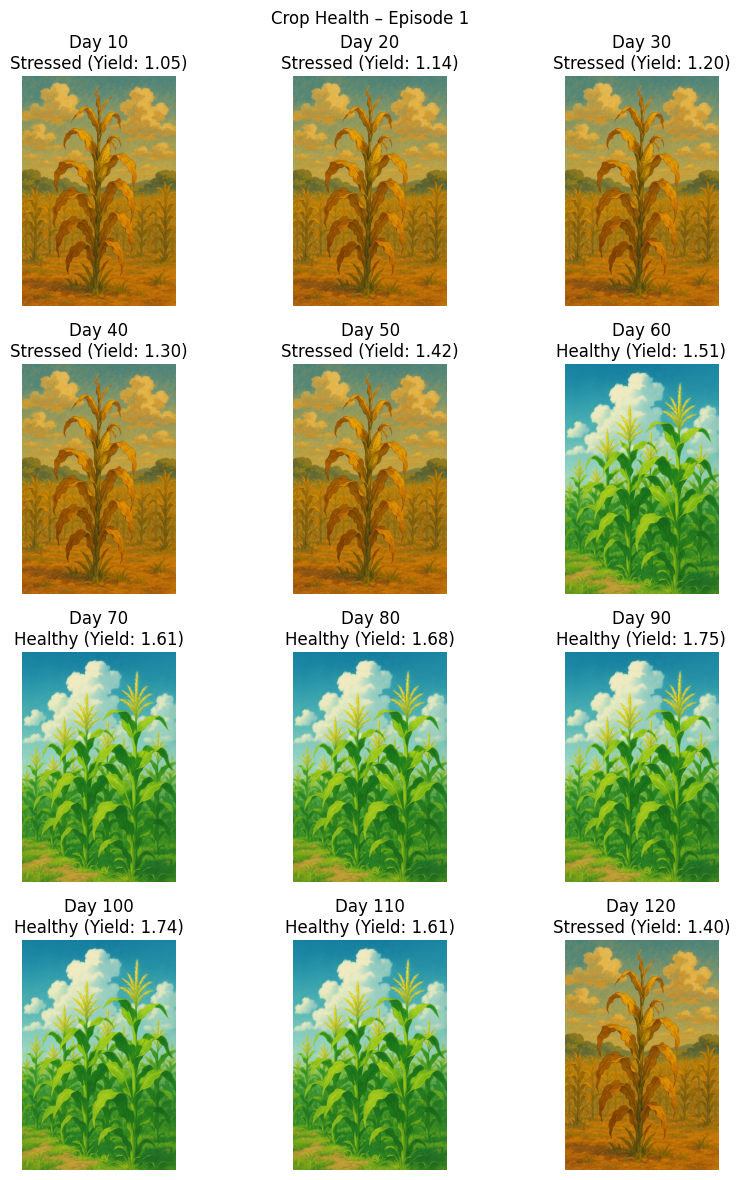

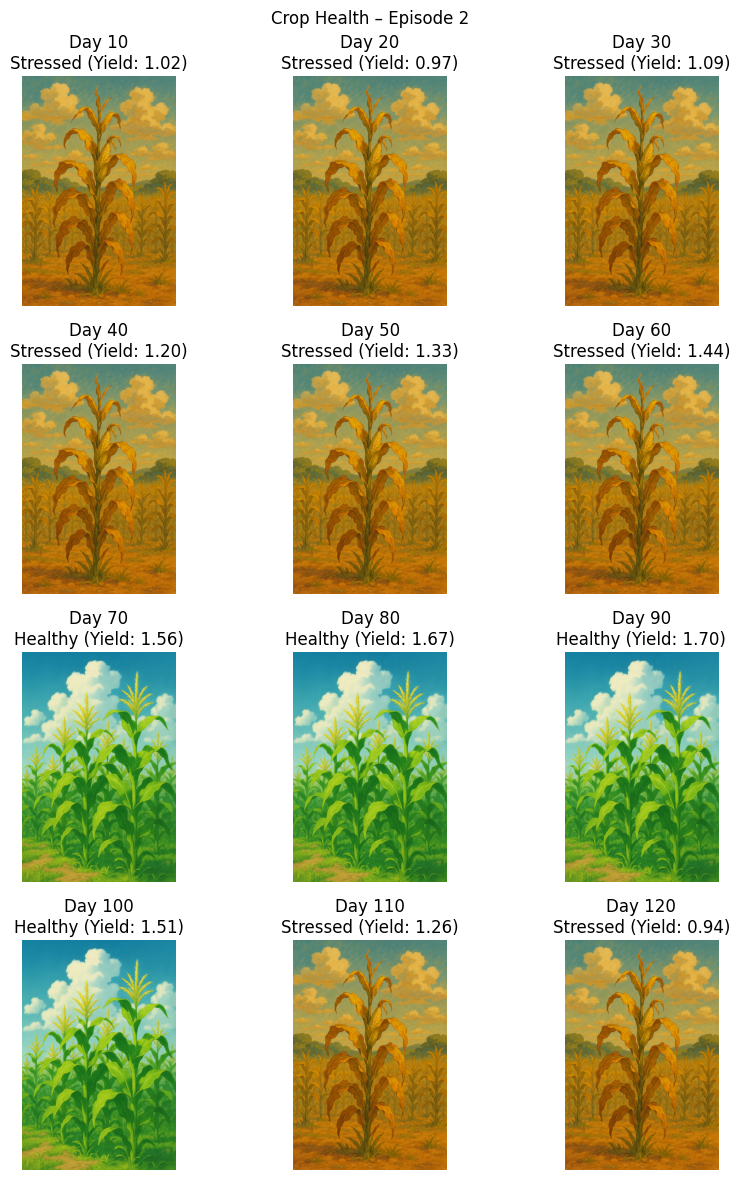

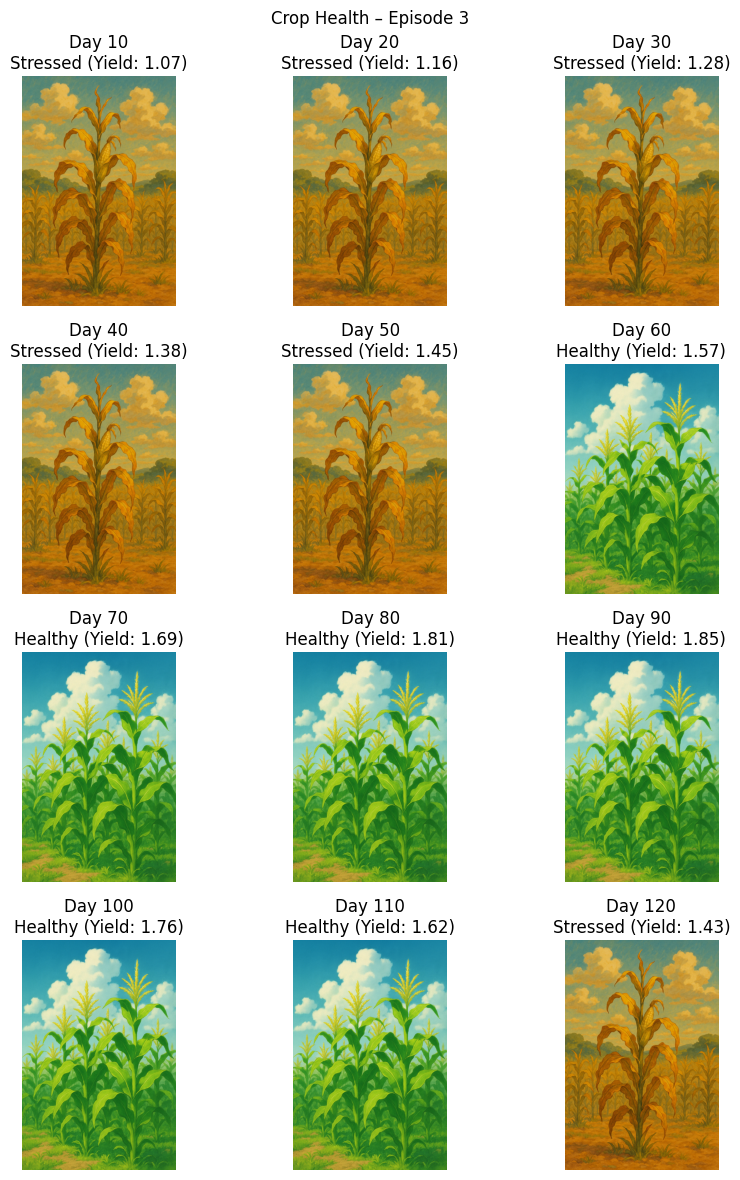

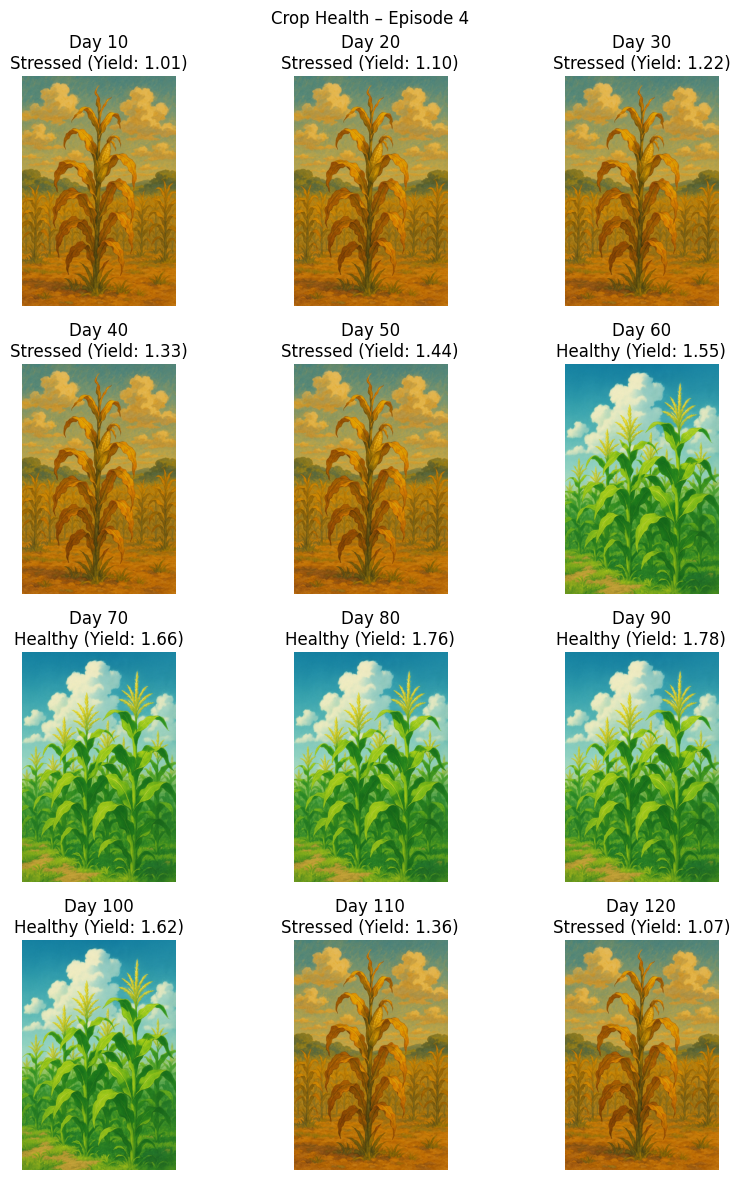

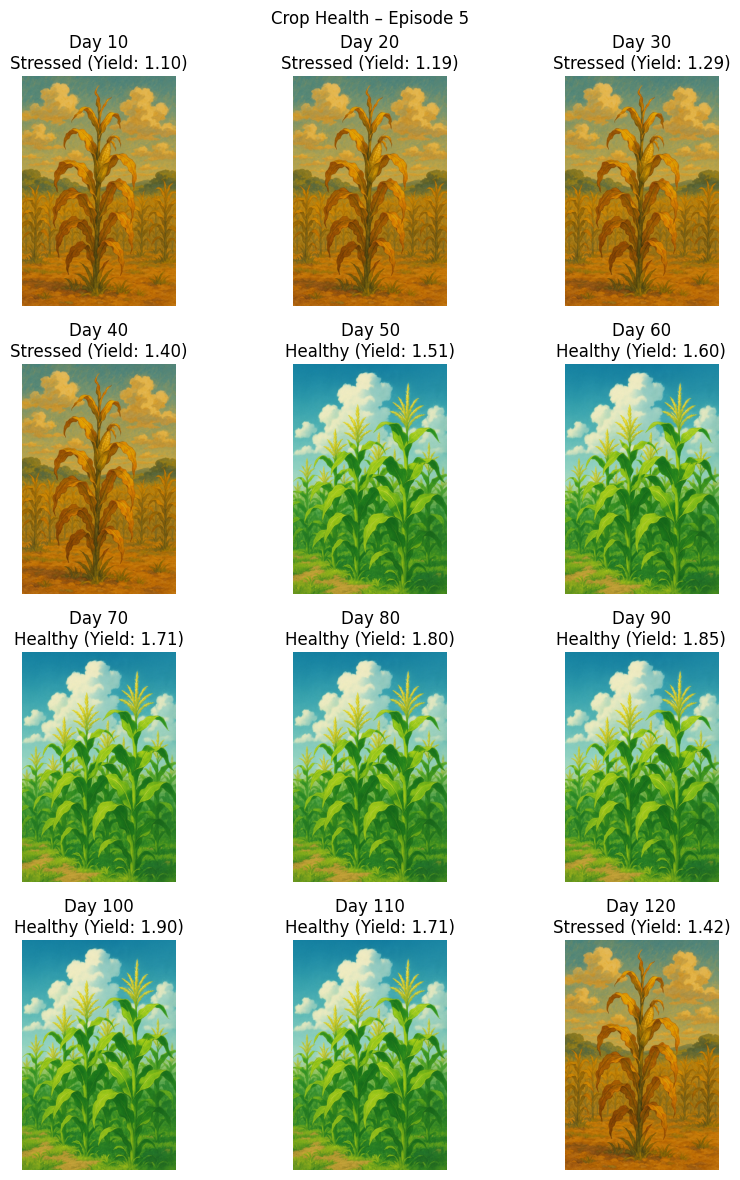

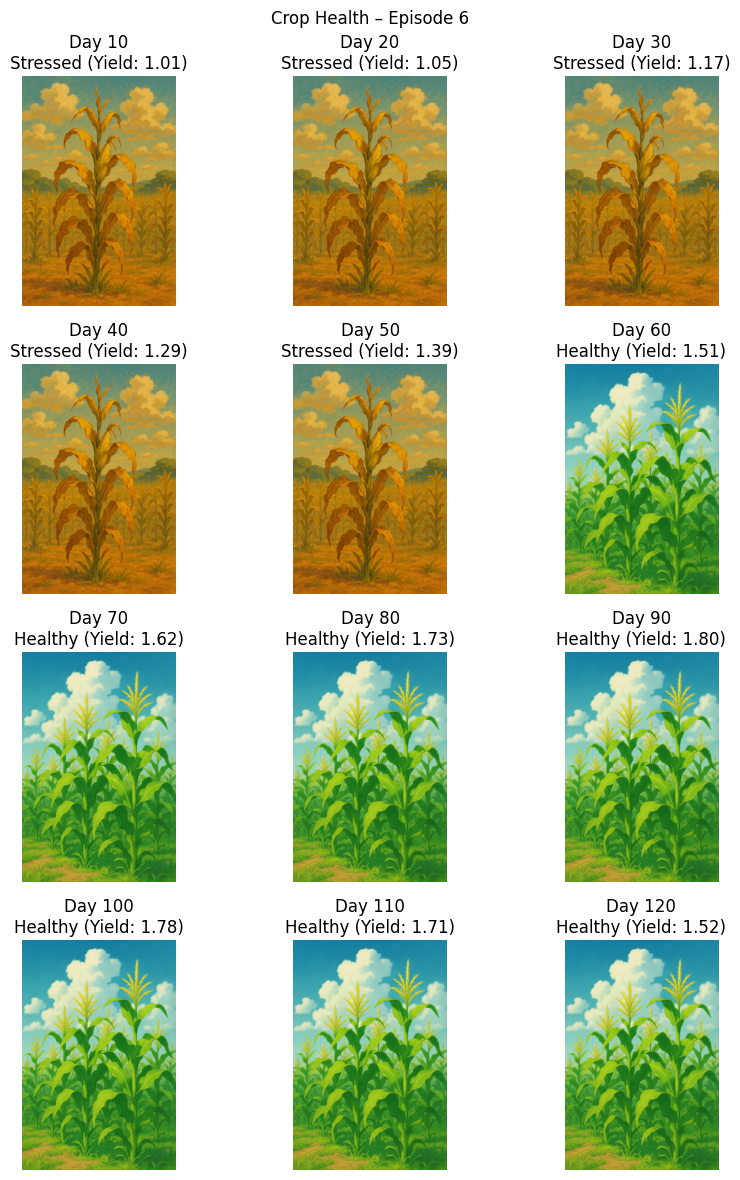

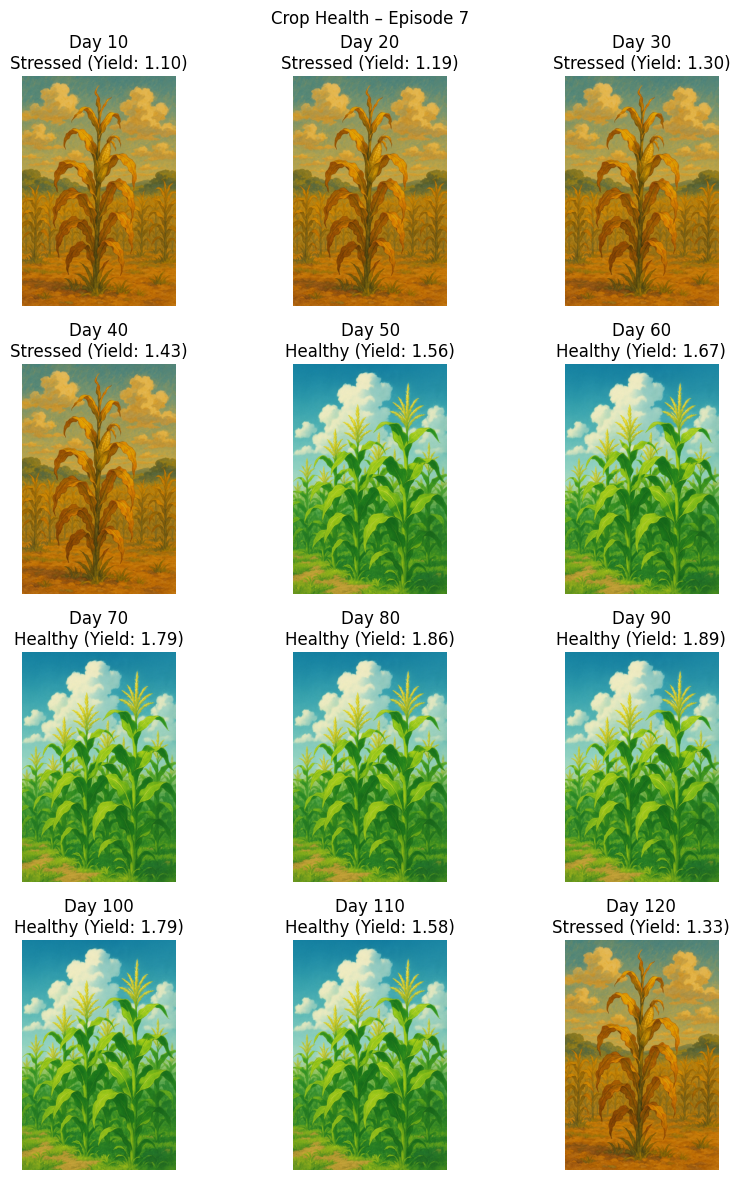

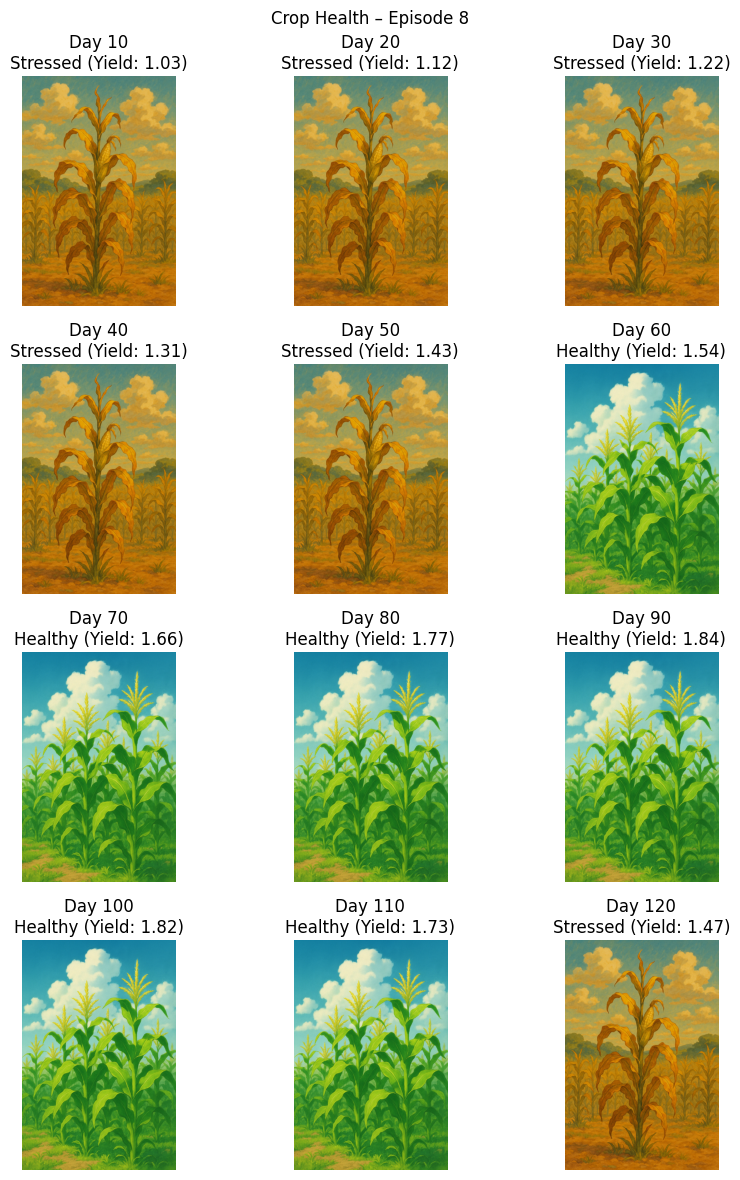

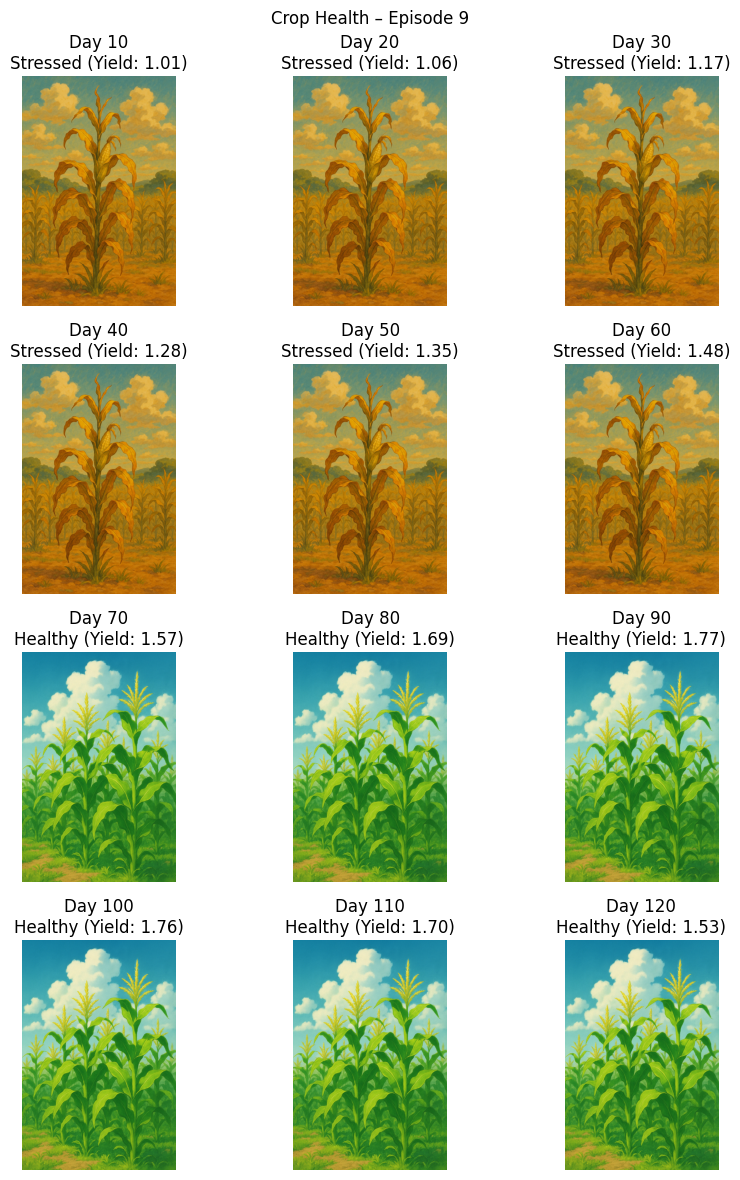

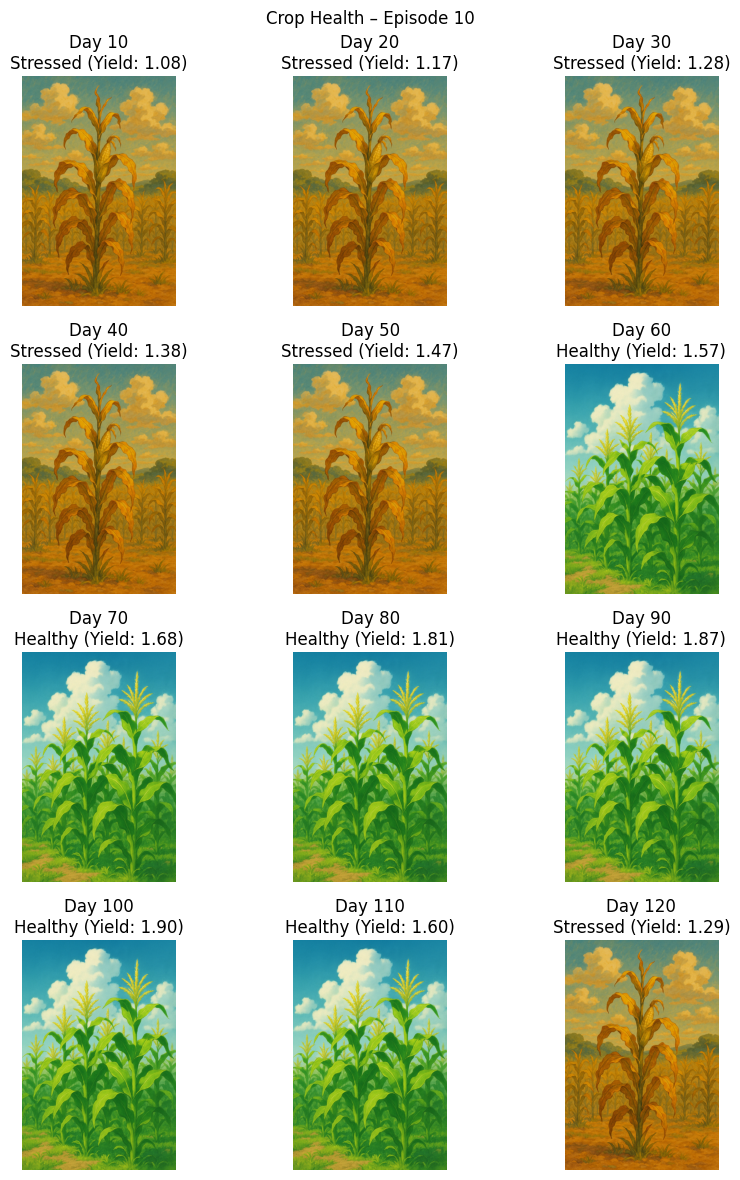


📊 Crop Report 📊
🌽 Yield: 1.34 (range: 0.94–1.53)
💧 Water Used: 190.00 mm
🌱 Moisture: 76.56% avg
📈 Episodes: 10


episode  total_reward  final_yield_potential  total_water_used  \
0        0   1084.949895               1.399165               200   
1        1    858.529317               0.943822               180   
2        2   1127.049258               1.427488               190   
3        3   1024.257160               1.070953               210   
4        4   1285.034805               1.420580               170   
5        5   1077.204246               1.516737               190   
6        6   1116.547409               1.334123               190   
7        7   1205.323923               1.470399               200   
8        8   1081.422909               1.528715               190   
9        9   1182.431850               1.293864               180   

   avg_soil_moisture  
0          74.437348  
1          80.563540  
2          76.495589  
3          77.153232  
4          75.859929  
5          75.794986  
6          77.125464  
7          75.692064  
8          75.747006  
9          76.767419

In [6]:
trainer.evaluate_model(model, env, n_eval_episodes=10)

Day   1 | Stage: Seedling  | Action: 0 ( 0mm) | Soil Moisture: 60.1% | Yield: 1.00
Day  10 | Stage: Seedling  | Action: 0 ( 0mm) | Soil Moisture: 85.0% | Yield: 1.04
Day  20 | Stage: Jointing  | Action: 0 ( 0mm) | Soil Moisture: 80.3% | Yield: 1.03
Day  30 | Stage: Jointing  | Action: 0 ( 0mm) | Soil Moisture: 76.8% | Yield: 1.15
Day  40 | Stage: Staminate | Action: 0 ( 0mm) | Soil Moisture: 74.2% | Yield: 1.26
Day  50 | Stage: Staminate | Action: 0 ( 0mm) | Soil Moisture: 82.9% | Yield: 1.35
Day  60 | Stage: Filling   | Action: 2 (10mm) | Soil Moisture: 75.9% | Yield: 1.47
Day  70 | Stage: Filling   | Action: 0 ( 0mm) | Soil Moisture: 73.6% | Yield: 1.59
Day  80 | Stage: Filling   | Action: 2 (10mm) | Soil Moisture: 77.2% | Yield: 1.70
Day  90 | Stage: Maturity  | Action: 0 ( 0mm) | Soil Moisture: 86.7% | Yield: 1.73
Day 100 | Stage: Maturity  | Action: 0 ( 0mm) | Soil Moisture: 94.2% | Yield: 1.58
Day 110 | Stage: Maturity  | Action: 0 ( 0mm) | Soil Moisture: 96.6% | Yield: 1.37
Day 

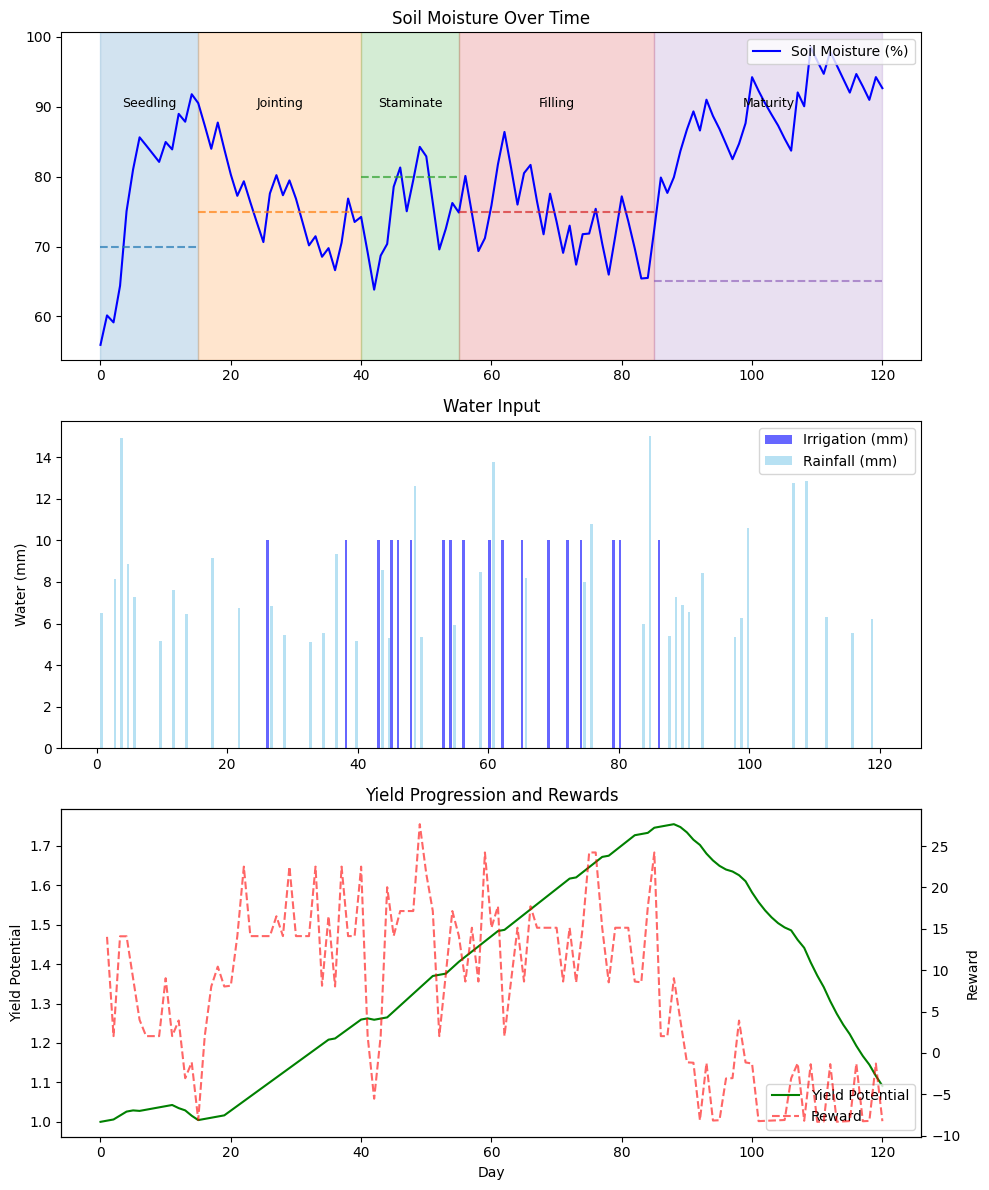


--- Season Summary ---
Final Yield: 1.09
Total Water Used: 180.0 mm
Total Rainfall: 326.7 mm
Water Efficiency: 0.606


In [7]:
# Run a single episode with rendering
total_reward, final_yield, total_water = trainer.run_single_episode(model, env, render=True, seed=42)

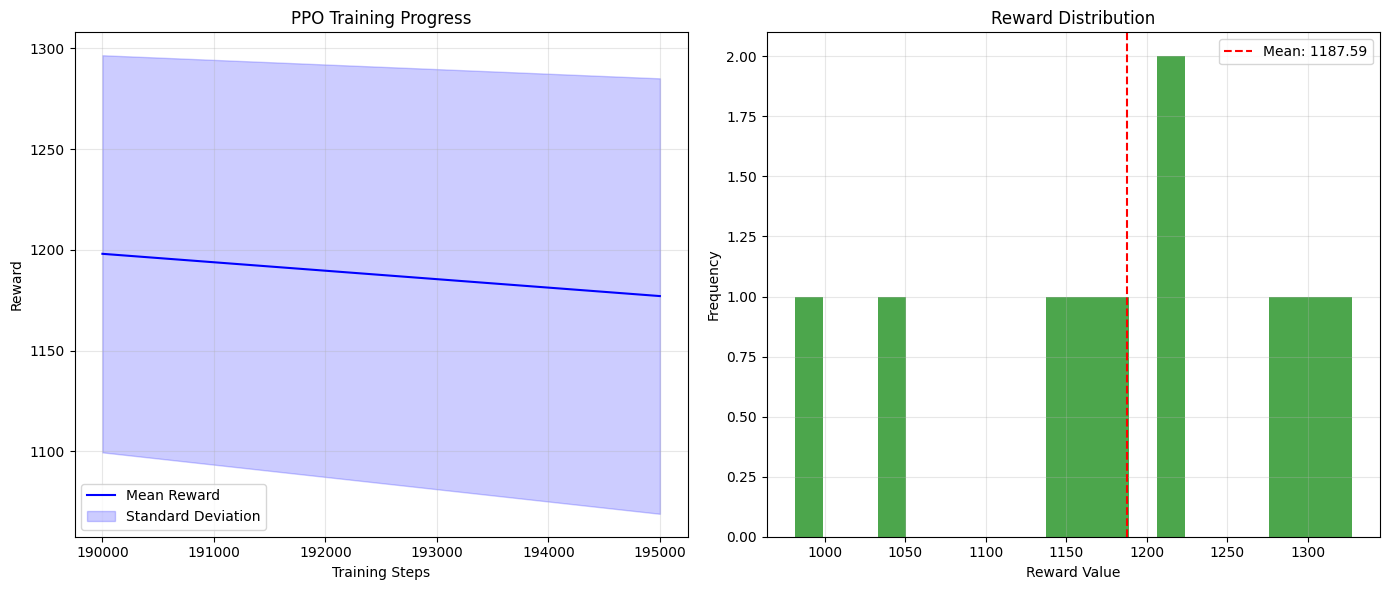


Training Summary for PPO
Total training steps: 195,000
Initial mean reward: 1198.07
Final mean reward: 1177.10
Improvement: -20.97 (-1.8%)
Best mean reward: 1198.07 (at step 190,000)


In [8]:
# Initialize the visualizer
visualizer = SimpleTrainingVisualizer(log_dir="./logs")

# Plot training progress
visualizer.plot_training_progress(model_type="ppo")